(569, 30) (569,)


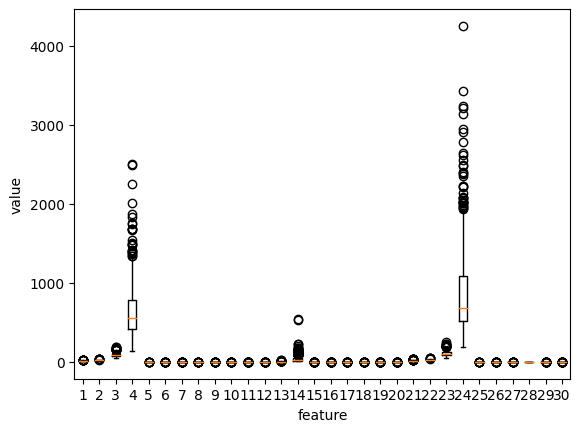

(array([0, 1]), array([212, 357]))

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

np.unique(cancer.target, return_counts=True)

In [3]:
x = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True)

class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self ,z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

(455, 30) (114, 30)


0.8245614035087719

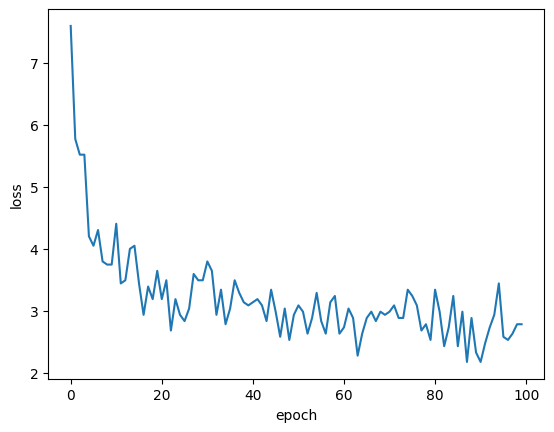

In [4]:
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self ,z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [9]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])